## Seleção de Modelos & Métricas de avaliação

#### 1 - Bibliotecas, Datasets e Funções de Plotagem

In [2]:
# libs

%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_digits

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

<IPython.core.display.Javascript object>


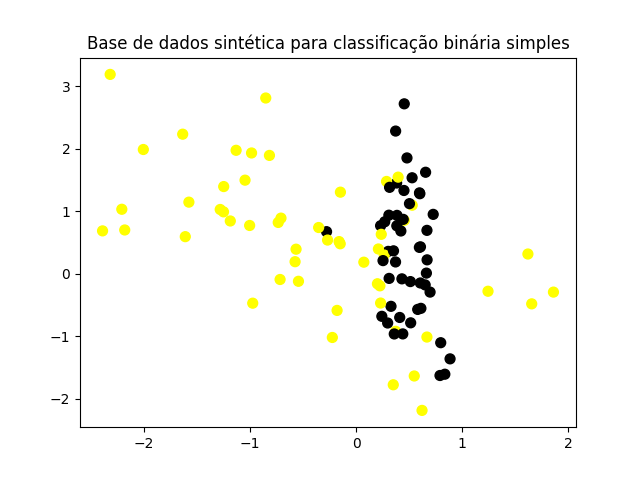

<IPython.core.display.Javascript object>


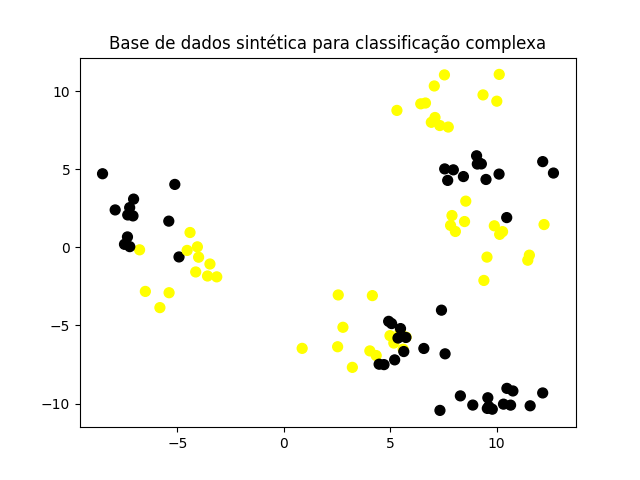

In [3]:
# Base de Dados Frutas
fruits = pd.read_table('./Data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)


# Base de dados sintética para classificação binária simples
plt.figure()
plt.title('Base de dados sintética para classificação binária simples')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Base de dados sintética para classificação complexa
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Base de dados sintética para classificação complexa')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [5]:
#Funções de Plotagem

def plot_class_regions_for_classifier_subplot(clf, X, y, 
                                              X_test, y_test, 
                                              title, subplot, 
                                              target_names = None, 
                                              plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTreinamento = {:.2f}, Teste = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, 
                                      X_test=None, y_test=None, 
                                      title=None, 
                                      target_names = None, 
                                      plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTreinamento = {:.2f}, Teste = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

#### 2 - Exemplo de Validação Cruzada

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

print('Acurácia', cross_val_score(clf, X, y, cv=5))
print('AUC', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Recall', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Acurácia [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
AUC [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Recall [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### 3 - Exemplo de GridSearch

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# Acurácia é o Padrão
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Melhor parâmetro (max. acurácia): ', grid_clf_acc.best_params_)
print('Melhor escore (acurácia): ', grid_clf_acc.best_score_)
print()

# AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 
# roc_auc_score?

print('Conjunto de teste AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Melhor parâmetro (max. AUC): ', grid_clf_auc.best_params_)
print('Melhor escore (AUC): ', grid_clf_auc.best_score_)

Melhor parâmetro (max. acurácia):  {'gamma': 0.001}
Melhor escore (acurácia):  0.9985157648354676

Conjunto de teste AUC:  0.99982858122393
Melhor parâmetro (max. AUC):  {'gamma': 0.001}
Melhor escore (AUC):  1.0


#### 4 - Lista completa das métricas de avaliação suportadas pelo sklearn.

In [19]:
# from sklearn.metrics.scorer import SCORERS

# print(sorted(list(SCORERS.keys())))

#### 5 - Otimizando o classificador usando métricas de desempenho diferentes

<IPython.core.display.Javascript object>


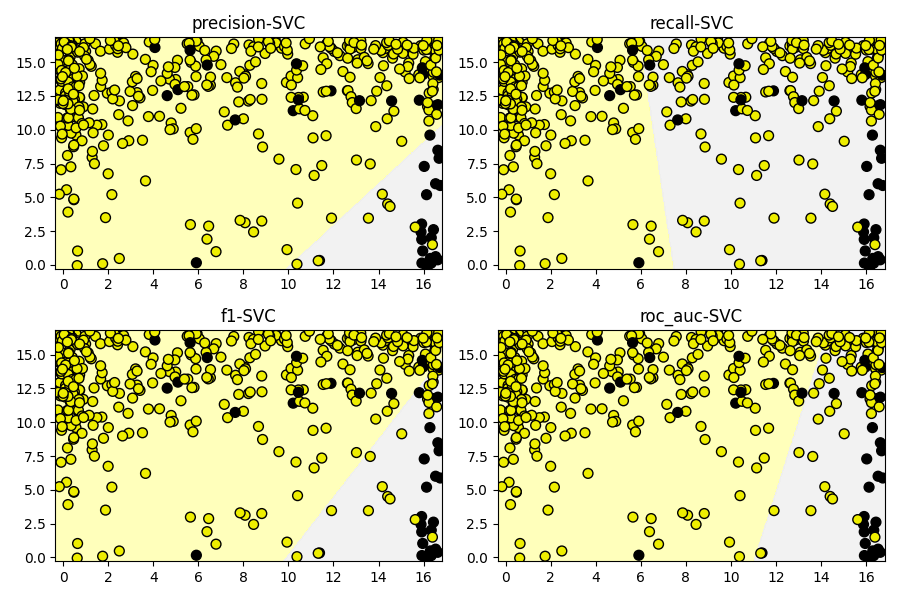

Melhor parâmetro (max. precision): {'class_weight': {1: 2}}
Melhor escore (precision): 0.530690537084399

Melhor parâmetro (max. recall): {'class_weight': {1: 50}}
Melhor escore (recall): 0.9285714285714285

Melhor parâmetro (max. f1): {'class_weight': {1: 3}}
Melhor escore (f1): 0.5520959490283193

Melhor parâmetro (max. roc_auc): {'class_weight': {1: 4}}
Melhor escore (roc_auc): 0.8932829126529617



In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Melhor parâmetro (max. {0}): {1}'.format(eval_metric, grid_clf_custom.best_params_))
    print('Melhor escore ({0}): {1}\n'.format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-SVC')
plt.tight_layout()
plt.show()

#### 6 - Curva de precisão-recall para classificador SVC - pesos de classe balanceados

<IPython.core.display.Javascript object>


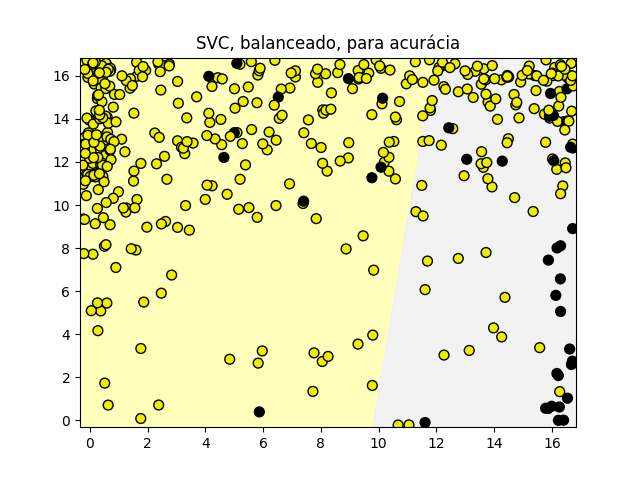

<IPython.core.display.Javascript object>


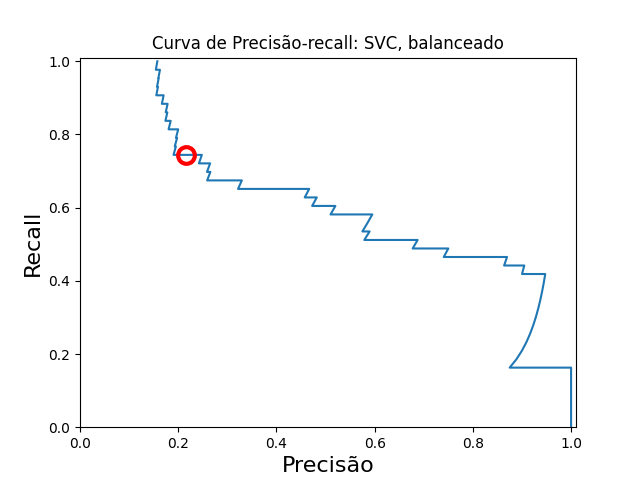

No zero, precisão: 0.22, recall: 0.74


In [27]:
from sklearn.metrics import precision_recall_curve

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, balanceado, para acurácia")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Curva de Precisão-recall: SVC, balanceado")
plt.plot(precision, recall, label = 'Curva de Precisão-recall')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precisão', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()
print('No zero, precisão: {:.2f}, recall: {:.2f}'.format(closest_zero_p, closest_zero_r))

## Classificadores Naive Bayes

#### 7 - Exemplo de classificador Gaussiano Naive Bayes

<IPython.core.display.Javascript object>


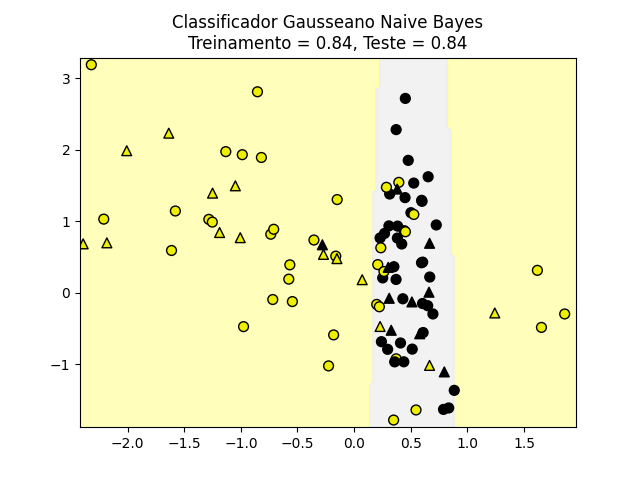

In [28]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Classificador Gausseano Naive Bayes')

#### 8 - Exemplo de classificador Gaussiano Naive Bayes em uma base de dados complexa

<IPython.core.display.Javascript object>


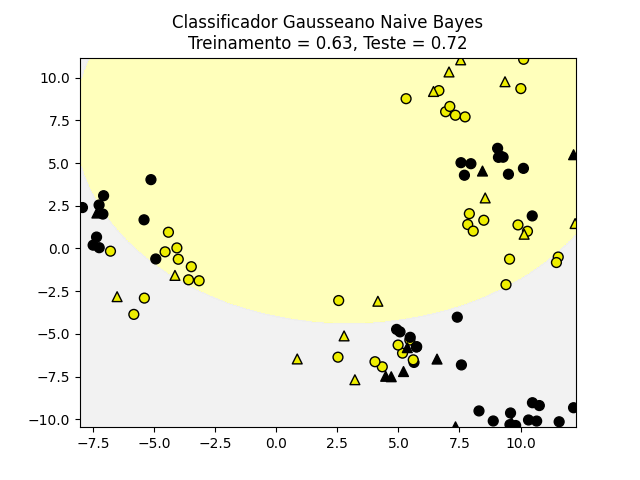

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Classificador Gausseano Naive Bayes')

## Conjuntos de árvores de decisão


#### 8 - Florestas Aleatórias

<IPython.core.display.Javascript object>


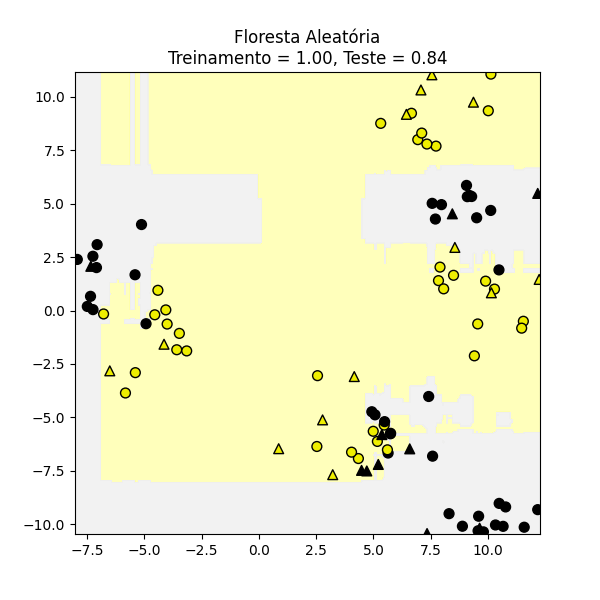

In [31]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)

title = 'Floresta Aleatória'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,y_test, title, subaxes)

plt.show()

#### 9 - Floresta aleatória na base de dados frutas

<IPython.core.display.Javascript object>


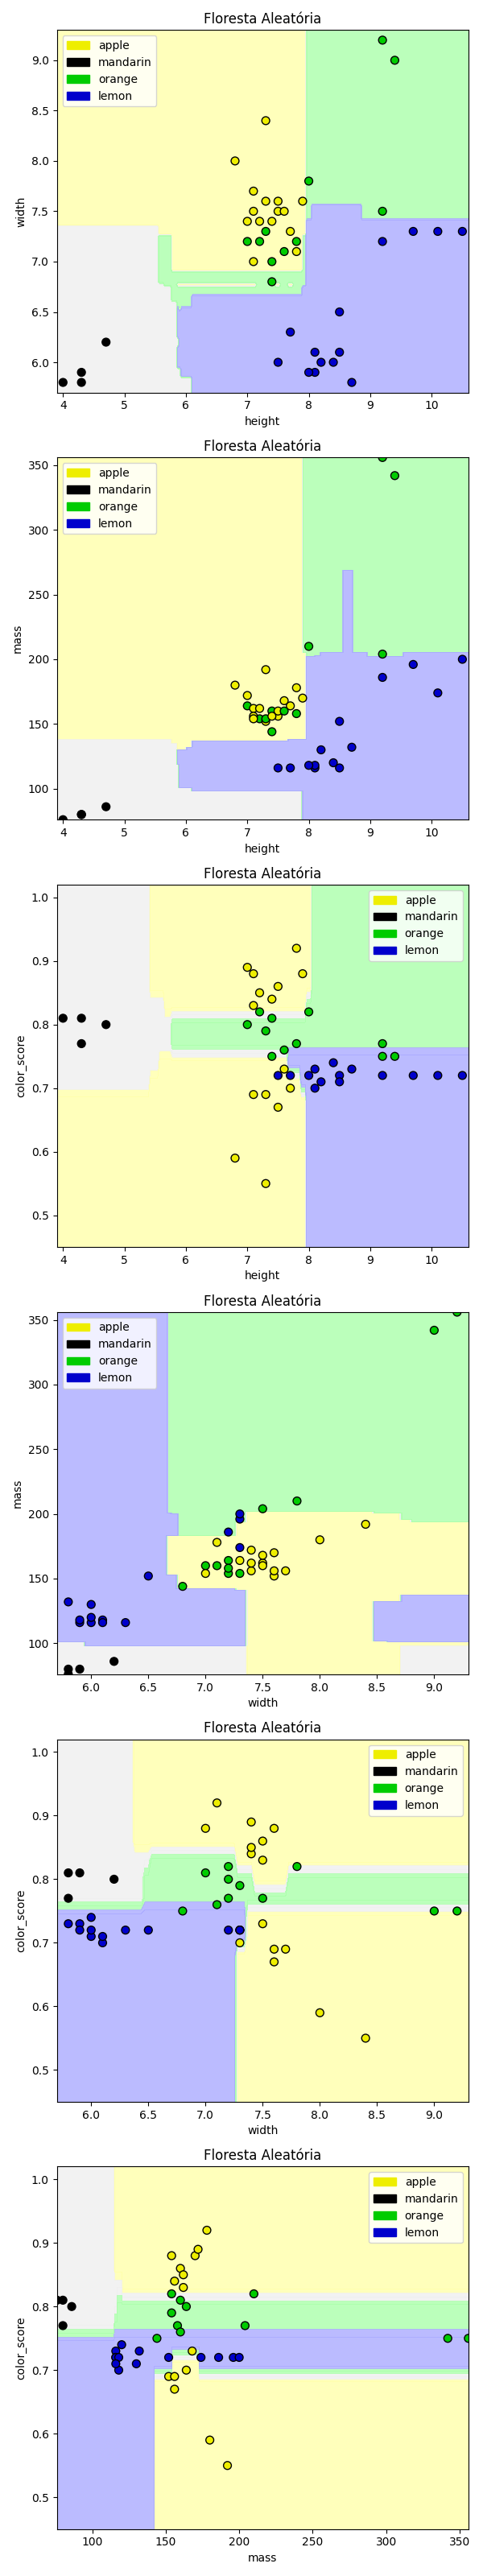

Acurácia no treinamento: 1.00
Acurácia no teste: 0.80


In [32]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(), y_fruits.to_numpy(), random_state = 0)

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))
title = 'Floresta Aleatória'

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier(n_jobs=8, max_depth = 2).fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10, random_state=0).fit(X_train, y_train)

print('Acurácia no treinamento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Acurácia no teste: {:.2f}'.format(clf.score(X_test, y_test)))

#### 10 - Árvores de decisão com o gradiente aumentado (Gradient-boosted)

<IPython.core.display.Javascript object>


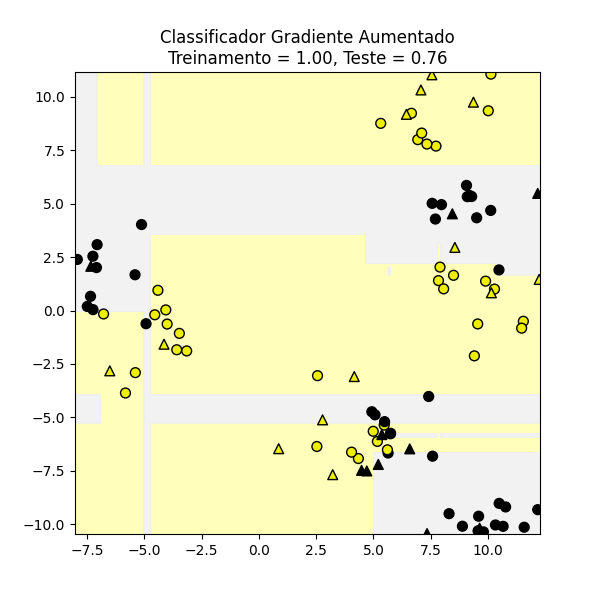

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)

title = 'Classificador Gradiente Aumentado'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### 11 - Árvores com gradiente aumentado no dataset de frutas

<IPython.core.display.Javascript object>


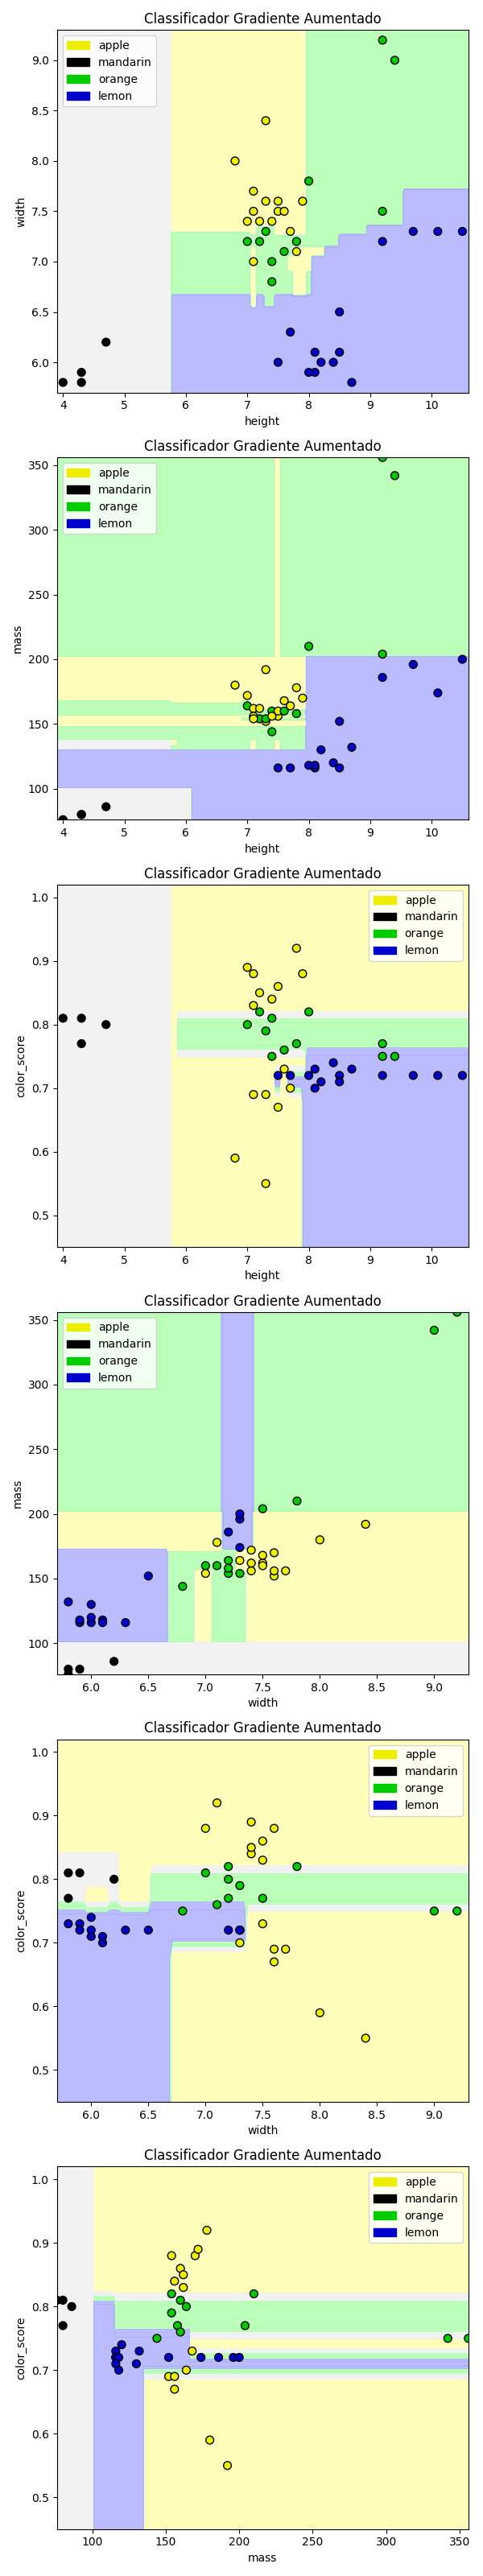

Acurácia no treinamento: 1.00
Acurácia no teste: 0.80


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(), y_fruits.to_numpy(),random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

clf = GradientBoostingClassifier?

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = GradientBoostingClassifier().fit(X_train, y_train)

print('Acurácia no treinamento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Acurácia no teste: {:.2f}'.format(clf.score(X_test, y_test)))

### Modelos lineares para classificação multi-classe

#### 12 - Função LinearSVC (Um contra todos)

In [37]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coeficientes:\n', clf.coef_)
print('Interceptos:\n', clf.intercept_)

Coeficientes:
 [[-0.30006303  0.71557482]
 [-1.62785586  1.15837035]
 [ 0.00721513  0.43311565]
 [ 1.2474674  -1.64209043]]
Interceptos:
 [-3.28519908  1.19823407 -3.04188368  1.16397746]


/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


!!
-> coeficiente de regressão = declive da linha de regressão, pesos, estimativas de parâmetro
-> intercepto = valor previsto quando x=0

#### 13 - Plot dos resultados multi-classe

<IPython.core.display.Javascript object>


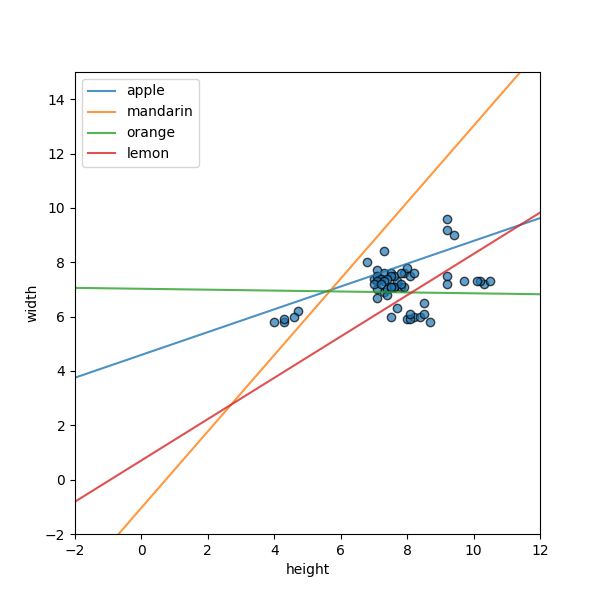

In [38]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

# falta c=y_fruits_2d
x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

### Avaliação para classificação multi-classe

#### 14 - Matriz de confusão multi-classe

<IPython.core.display.Javascript object>


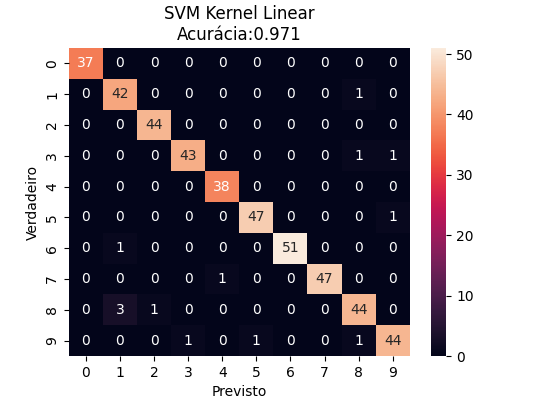

<IPython.core.display.Javascript object>


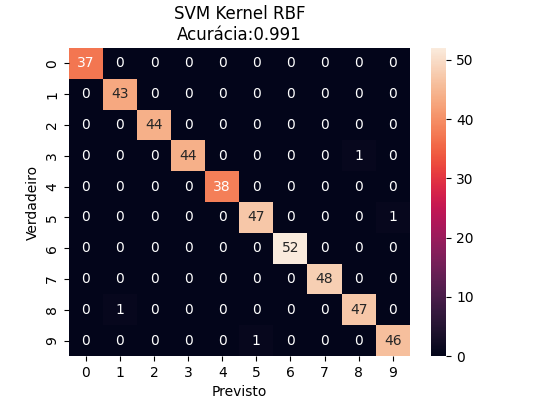

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

##
svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)

confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Kernel Linear\nAcurácia:{0:.3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

##
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)

confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Kernel RBF\nAcurácia:{0:.3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto');

#### 15 - Reporte de classificação multi-classe

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### 16 - Micro vs. Macro metrics

In [41]:
print('Precisão Micro-média = {:.2f} (trata as instâncias igualmente)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Precisão Macro-média = {:.2f} (trata as classes igualmente)\n'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))


print('Micro-média f1 = {:.2f} (trata as instâncias igualmente)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-média f1 = {:.2f} (trata as classes igualmente)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))


Precisão Micro-média = 0.99 (trata as instâncias igualmente)
Precisão Macro-média = 0.99 (trata as classes igualmente)

Micro-média f1 = 0.99 (trata as instâncias igualmente)
Macro-média f1 = 0.99 (trata as classes igualmente)


### Métrica para Regressão

#### 17 - Exemplo com a função LinearRegression()

Coeficientes:  [-698.80206267]
Erro quadrado médio (dummy): 4965.13
Erro quadrado médio (linear model): 4646.74
Escore r2 (dummy): -0.00
Escore r2 (linear model): 0.06


<IPython.core.display.Javascript object>


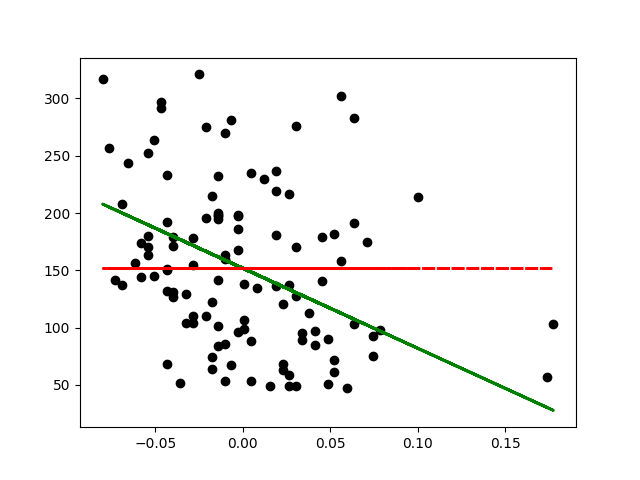

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Coeficientes: ', lm.coef_)
print("Erro quadrado médio (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Erro quadrado médio (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("Escore r2 (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("Escore r2 (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()